<a href="https://colab.research.google.com/github/turnning2025/Larvathon1st/blob/main/%EC%96%BC%EA%B5%B4%EC%B6%94%EC%B6%9C_%EB%A7%88%ED%82%B9_20251119_%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install mediapipe

import cv2
import mediapipe as mp
import numpy as np

# Mediapipe 초기화
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# 이미지 불러오기
image = cv2.imread("face.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 얼굴 검출
with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    results = face_detection.process(image_rgb)

    if results.detections:
        for detection in results.detections:
            # 얼굴 영역 추출 (bounding box)
            bboxC = detection.location_data.relative_bounding_box
            h, w, c = image.shape
            x1, y1 = int(bboxC.xmin * w), int(bboxC.ymin * h)
            x2, y2 = int((bboxC.xmin + bboxC.width) * w), int((bboxC.ymin + bboxC.height) * h)

            # 얼굴만 잘라내기
            face_crop = image[y1:y2, x1:x2]

            # 결과 출력
            cv2.imshow("Face Only", face_crop)
            cv2.waitKey(0)


/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


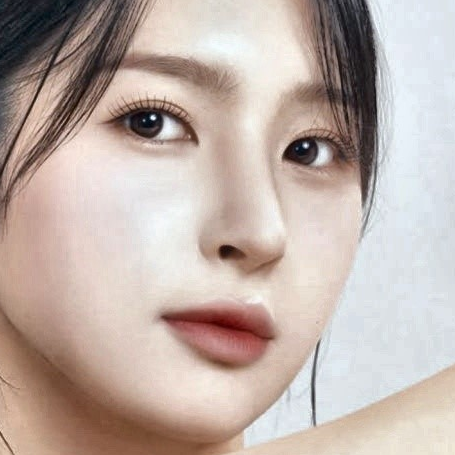

In [2]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 불러오기
image = cv2.imread("face.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mp_face_detection = mp.solutions.face_detection

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    results = face_detection.process(image_rgb)

    if results.detections:
        for detection in results.detections:
            bboxC = detection.location_data.relative_bounding_box
            h, w, c = image.shape
            x1, y1 = int(bboxC.xmin * w), int(bboxC.ymin * h)
            x2, y2 = int((bboxC.xmin + bboxC.width) * w), int((bboxC.ymin + bboxC.height) * h)

            face_crop = image[y1:y2, x1:x2]

            # Colab에서는 cv2_imshow 사용
            cv2_imshow(face_crop)


Showing face from image1.jpg


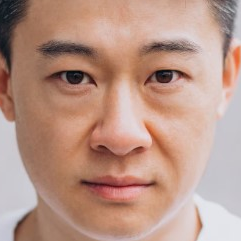

Showing face from image2.jpg


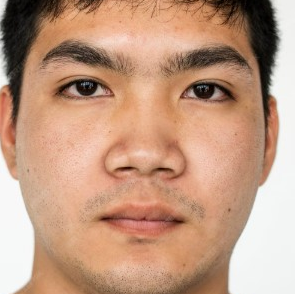

Showing face from image3.jpg


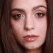

In [3]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow

# Mediapipe 초기화
mp_face_detection = mp.solutions.face_detection

# 여러 장의 이미지 파일 이름
images = ["image1.jpg", "image2.jpg", "image3.jpg"]

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    for img_path in images:
        image = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        results = face_detection.process(image_rgb)

        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                h, w, c = image.shape
                x1, y1 = int(bboxC.xmin * w), int(bboxC.ymin * h)
                x2, y2 = int((bboxC.xmin + bboxC.width) * w), int((bboxC.ymin + bboxC.height) * h)

                # 얼굴만 잘라내기
                face_crop = image[y1:y2, x1:x2]

                # Colab에서는 cv2_imshow 사용
                print(f"Showing face from {img_path}")
                cv2_imshow(face_crop)


Showing face with white background from image1.jpg


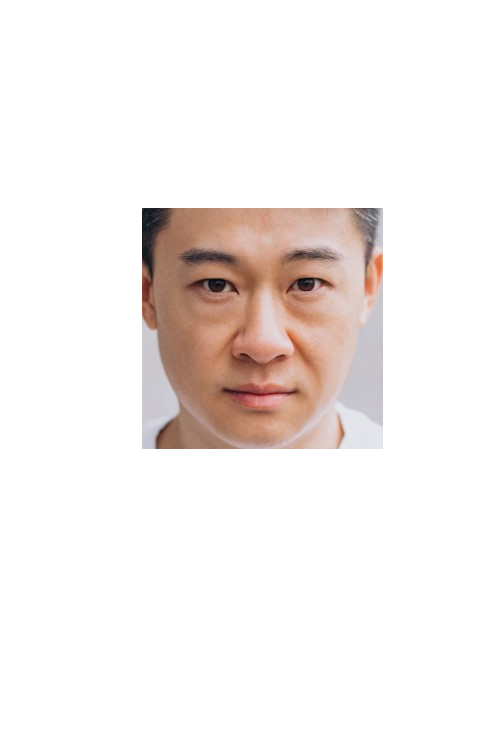

Showing face with white background from image2.jpg


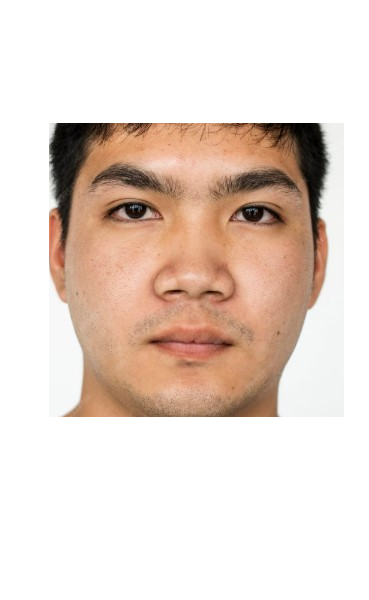

Showing face with white background from image3.jpg


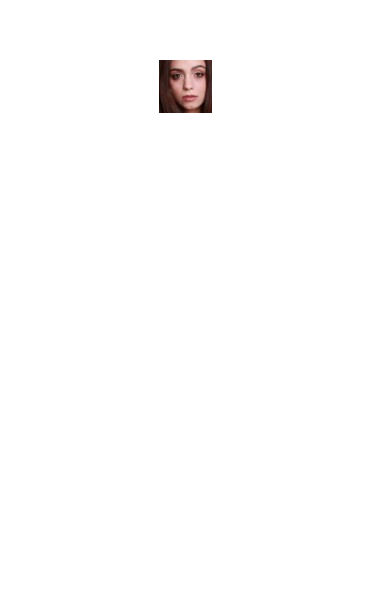

In [4]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow

# Mediapipe 초기화
mp_face_detection = mp.solutions.face_detection

# 여러 장의 이미지 파일 이름
images = ["image1.jpg", "image2.jpg", "image3.jpg"]

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    for img_path in images:
        image = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        results = face_detection.process(image_rgb)

        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                h, w, c = image.shape
                x1, y1 = int(bboxC.xmin * w), int(bboxC.ymin * h)
                x2, y2 = int((bboxC.xmin + bboxC.width) * w), int((bboxC.ymin + bboxC.height) * h)

                # 흰색 배경 생성
                white_bg = np.ones_like(image) * 255

                # 얼굴 영역만 복사
                white_bg[y1:y2, x1:x2] = image[y1:y2, x1:x2]

                # 결과 출력
                print(f"Showing face with white background from {img_path}")
                cv2_imshow(white_bg)


Showing face outline with green curve from image1.jpg


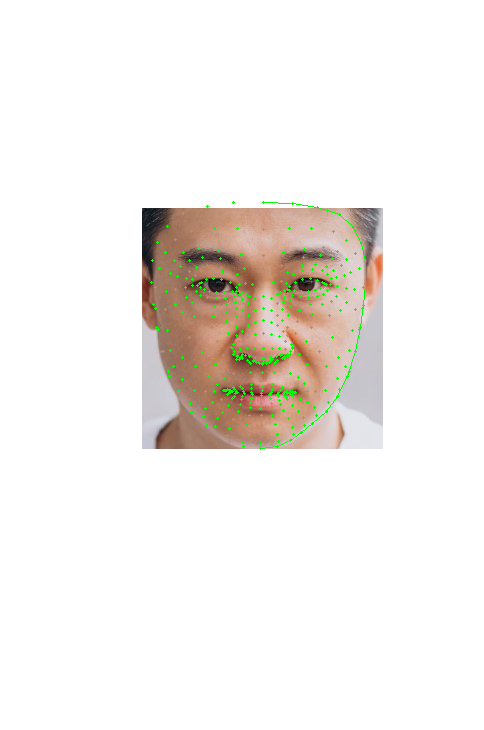

Showing face outline with green curve from image2.jpg


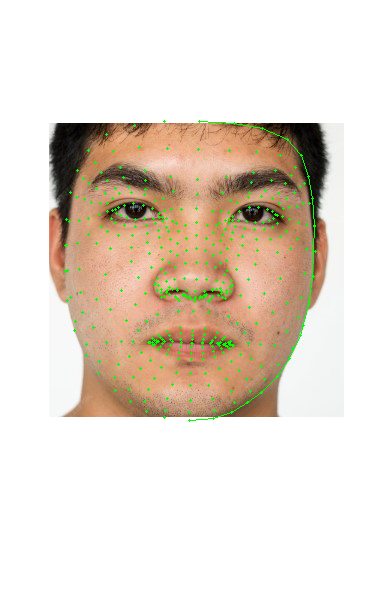

Showing face outline with green curve from image3.jpg


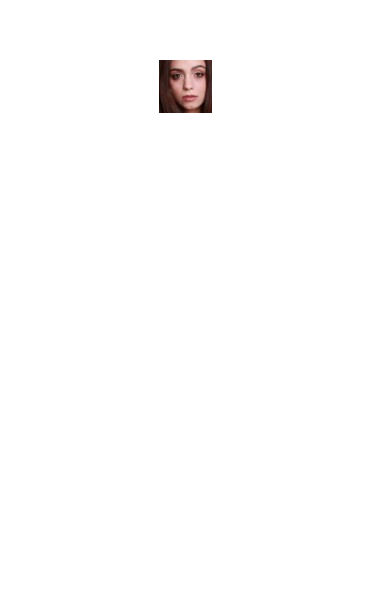

In [5]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow

# Mediapipe 초기화
mp_face_detection = mp.solutions.face_detection
mp_face_mesh = mp.solutions.face_mesh

# 여러 장의 이미지 파일 이름
images = ["image1.jpg", "image2.jpg", "image3.jpg"]

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection, \
     mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5) as face_mesh:

    for img_path in images:
        image = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        results = face_detection.process(image_rgb)

        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                h, w, c = image.shape
                x1, y1 = int(bboxC.xmin * w), int(bboxC.ymin * h)
                x2, y2 = int((bboxC.xmin + bboxC.width) * w), int((bboxC.ymin + bboxC.height) * h)

                # 흰색 배경 생성
                white_bg = np.ones_like(image) * 255
                white_bg[y1:y2, x1:x2] = image[y1:y2, x1:x2]

                # 얼굴 메쉬 추출
                mesh_results = face_mesh.process(image_rgb)

                if mesh_results.multi_face_landmarks:
                    for face_landmarks in mesh_results.multi_face_landmarks:
                        # 얼굴 윤곽선(예: 외곽 라인) 그리기
                        for idx in range(0, 468):  # Mediapipe FaceMesh는 468개 포인트 제공
                            x = int(face_landmarks.landmark[idx].x * w)
                            y = int(face_landmarks.landmark[idx].y * h)
                            cv2.circle(white_bg, (x, y), 1, (0, 255, 0), -1)  # 녹색 점

                        # 윤곽선을 연결 (예: 턱 라인)
                        jaw_points = [10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 397, 365, 379, 378, 400, 377, 152]
                        for i in range(len(jaw_points)-1):
                            x1 = int(face_landmarks.landmark[jaw_points[i]].x * w)
                            y1 = int(face_landmarks.landmark[jaw_points[i]].y * h)
                            x2 = int(face_landmarks.landmark[jaw_points[i+1]].x * w)
                            y2 = int(face_landmarks.landmark[jaw_points[i+1]].y * h)
                            cv2.line(white_bg, (x1, y1), (x2, y2), (0, 255, 0), 1)

                print(f"Showing face outline with green curve from {img_path}")
                cv2_imshow(white_bg)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')